<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

%matplotlib inline

Look into Dan et al dataset

In [2]:
data_dir = '../data/amp_wgs_comparison'
inf_amp = az.from_netcdf(f'{data_dir}/differentials_amp.nc')
inf_wgs = az.from_netcdf(f'{data_dir}/differentials_wgs.nc')

amp_diff = inf_amp['posterior']['diff'].to_dataframe()
wgs_diff = inf_wgs['posterior']['diff'].to_dataframe()

In [3]:
amp_rhat = az.rhat(inf_amp)
wgs_rhat = az.rhat(inf_wgs)

/mnt/home/jmorton/miniconda3/envs/qiime2-2021.4/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/mnt/home/jmorton/miniconda3/envs/qiime2-2021.4/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Rhat')

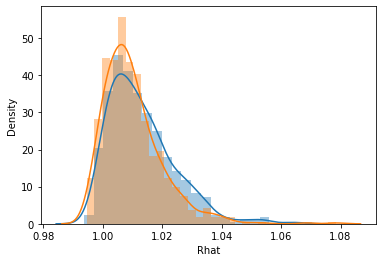

In [4]:
sns.distplot(amp_rhat['diff'])
sns.distplot(wgs_rhat['diff'])
plt.xlabel('Rhat')

In [5]:
amp_ess = az.ess(inf_amp)
wgs_ess = az.ess(inf_wgs)

/mnt/home/jmorton/miniconda3/envs/qiime2-2021.4/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/mnt/home/jmorton/miniconda3/envs/qiime2-2021.4/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Effective Sample Size')

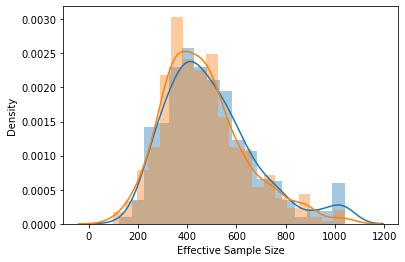

In [6]:
sns.distplot(amp_ess['diff'])
sns.distplot(wgs_ess['diff'])
plt.xlabel('Effective Sample Size')

In [7]:
amp_diff

diff
features chain draw          
1000569  0     0     1.083390
               1     0.396482
               2     1.976090
               3     2.042700
               4     2.827650
...                       ...
999419   3     95   -0.315076
               96   -0.474068
               97   -0.394095
               98   -0.602122
               99   -0.650355

[249200 rows x 1 columns]

In [8]:
wgs_diff

diff
features chain draw          
1000569  0     0     0.057989
               1     0.042082
               2     0.104097
               3    -0.072740
               4    -0.018352
...                       ...
999419   3     95    0.043801
               96    0.000391
               97    0.295529
               98    0.114192
               99    0.033379

[249200 rows x 1 columns]

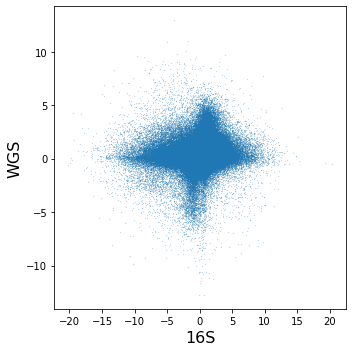

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(amp_diff.values, wgs_diff.values, s=.01)
ax.set_xlabel('16S', fontsize=16)
ax.set_ylabel('WGS', fontsize=16)
plt.tight_layout()

In [10]:
pearsonr(amp_diff.values.ravel(), wgs_diff.values.ravel())

(0.096250749442204, 0.0)

In [11]:
spearmanr(amp_diff.values.ravel(), wgs_diff.values.ravel())

SpearmanrResult(correlation=0.19881915432339536, pvalue=0.0)

In [12]:
amp_diff_df = pd.pivot(data=amp_diff.reset_index(), index='features', columns=('chain', 'draw'))
wgs_diff_df = pd.pivot(data=wgs_diff.reset_index(), index='features', columns=('chain', 'draw'))

amp_alr = amp_diff_df - amp_diff_df.iloc[0] 
wgs_alr = wgs_diff_df - wgs_diff_df.iloc[0] 

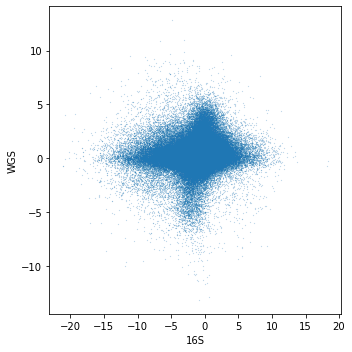

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(amp_alr.values.ravel(), wgs_alr.values.ravel(), s=.01)
ax.set_xlabel('16S')
ax.set_ylabel('WGS')
plt.tight_layout()

In [14]:
amp_mean = amp_diff.reset_index().groupby('features').mean()['diff']
wgs_mean = wgs_diff.reset_index().groupby('features').mean()['diff']

/mnt/home/jmorton/miniconda3/envs/qiime2-2021.4/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/mnt/home/jmorton/miniconda3/envs/qiime2-2021.4/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


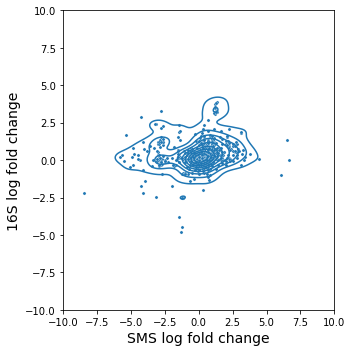

In [15]:

fig, ax = plt.subplots(figsize=(5, 5))
#ax.scatter(amp_mean.values, wgs_mean.values, s=3)
sns.kdeplot(amp_mean.values, wgs_mean.values)
sns.scatterplot(amp_mean.values, wgs_mean.values, s=10)
ax.set_xlabel('SMS log fold change', fontsize=14)
ax.set_ylabel('16S log fold change', fontsize=14)
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
plt.tight_layout()

In [16]:
pearsonr(amp_mean.values, wgs_mean.values)

(0.17321903494885807, 1.3753077654657678e-05)

In [17]:
spearmanr(amp_mean.values, wgs_mean.values)

SpearmanrResult(correlation=0.28089440997241133, pvalue=9.244825494812992e-13)

Look into cross-sectional cohort